In [15]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt 

# Project libraries
# set path to local modules and submodules
import sys, os
sys.path.append(os.path.abspath("src")) # add src folder to path
# import local modules and submodules
import data_ravers_utils.file_handler as fl
import data_ravers_utils.eda_utils as eda
import data_ravers_utils.visualization as plots

# Data

In [3]:
df_filename = 'bandcamp-sales-v1-cleaned'
data = fl.read_df_pickle(df_filename)
df = data.copy()
df.head(5)

,country_code,country,artist_name,amount_paid_usd,hour,dayofweek,month,year,weekday,weekend,...,media_type,media_type_details,discography_size,merch_type,is_bundle,amount_over_usd,item_price_usd,overpayment_usd,discount_usd,is_donation
0,gb,United Kingdom,Girl Band,9.99,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,9.99,2.288818e-07,0.000000e+00,1
1,fi,Finland,Jirah,1.30,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,1.30,0.000000e+00,0.000000e+00,0
2,fi,Finland,D-Ther,3.90,22,2,9,2020,2,False,...,digital,album,0,other,0,0.0,3.90,0.000000e+00,4.440892e-16,0
3,gb,United Kingdom,WHITE NOISE TV,12.39,22,2,9,2020,2,False,...,CD,no details,0,other,0,0.0,12.39,0.000000e+00,1.776357e-15,0
4,us,United States,LINGUA IGNOTA,1.00,22,2,9,2020,2,False,...,digital,single,0,other,0,0.0,1.00,0.000000e+00,0.000000e+00,0


In [6]:
target_variable = "amount_paid_usd"
sample = df[target_variable]


In [7]:
friday_payments = df[df["weekday"] ==5][target_variable]
friday_payments.head(2)

93956    2.00
93957    9.48
Name: amount_paid_usd, dtype: float64

In [9]:
mu = float(friday_payments.mean())

# Hypothesis

In [ ]:
null_hypothesis = "Sales on Bandcamp are not different on Fridays than on any other days of the week."

In [5]:
alternative_hypothesis = "Sales on Bandcamp are higher on Fridays."

# One tail T-test

In [10]:
# One-Tailed Test (Right-Tailed)
t_stat, p_value = st.ttest_1samp(sample, mu, alternative='greater')
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()



Test Statistic (t): 90.95
P-Value: 0.0000



In [12]:
alpha = 0.5

# Decision-Making
if p_value > alpha:
    print(f"Fail to Reject the Null Hypothesis: {null_hypothesis}")
else:
    print(f"Reject the Null Hypothesis: {alternative_hypothesis}")

Reject the Null Hypothesis: Sales on Bandcamp are higher on Fridays.


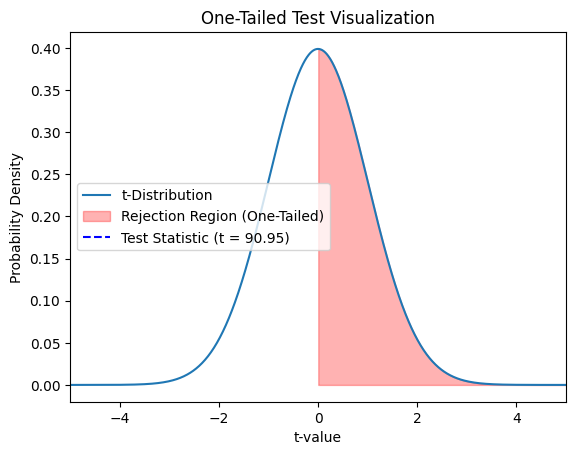

In [17]:
n = len(sample)
x = np.linspace(-5, 5, 1000)  # Changed from -4 to -5, and 4 to 5
y = st.t.pdf(x, df=n-1)

plt.plot(x, y, label="t-Distribution")
plt.fill_between(x, 0, y, where=(x > st.t.ppf(1 - alpha, df=n - 1)), color='red', alpha=0.3, label='Rejection Region (One-Tailed)')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Test Statistic (t = {t_stat:.2f})')
plt.title("One-Tailed Test Visualization")
plt.xlim(-5, 5)  # Optional: explicitly set x-axis limits
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()